In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [7]:
df['most ads day'].value_counts()

most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64

In [8]:
df.describe()


,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [9]:
df['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [10]:
df['test group'] = df['test group'].astype('category')
df['most ads day'] = df['most ads day'].astype('category')
df['converted'] = df['converted'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   user id        588101 non-null  int64   
 1   test group     588101 non-null  category
 2   converted      588101 non-null  int32   
 3   total ads      588101 non-null  int64   
 4   most ads day   588101 non-null  category
 5   most ads hour  588101 non-null  int64   
dtypes: category(2), int32(1), int64(3)
memory usage: 16.8 MB


In [21]:
intersection_users = list(set(df[df['test group'] == 'ad']['user id'].values) & \
set(df[df['test group'] == 'psa']['user id'].values))
print('Кол-во пользователей, попавших в обе группы:', len(intersection_users))

Кол-во пользователей, попавших в обе группы: 0


In [22]:
print(df['test group'].unique())

['ad', 'psa']
Categories (2, object): ['ad', 'psa']


In [23]:
# фильтруем данные группы ad
group_ad = df[df['test group'] == 'ad']
# фильтруем данные группы psa
group_psa = df[df['test group'] == 'psa']

In [24]:
print(f"Всего записей в данных: {len(df)}")

print(df['test group'].value_counts())
print(f"Уникальных пользователей: {df['user id'].nunique()}")
print(f"Дубликатов user id: {len(df) - df['user id'].nunique()}")

Всего записей в данных: 588101
test group
ad     564577
psa     23524
Name: count, dtype: int64
Уникальных пользователей: 588101
Дубликатов user id: 0


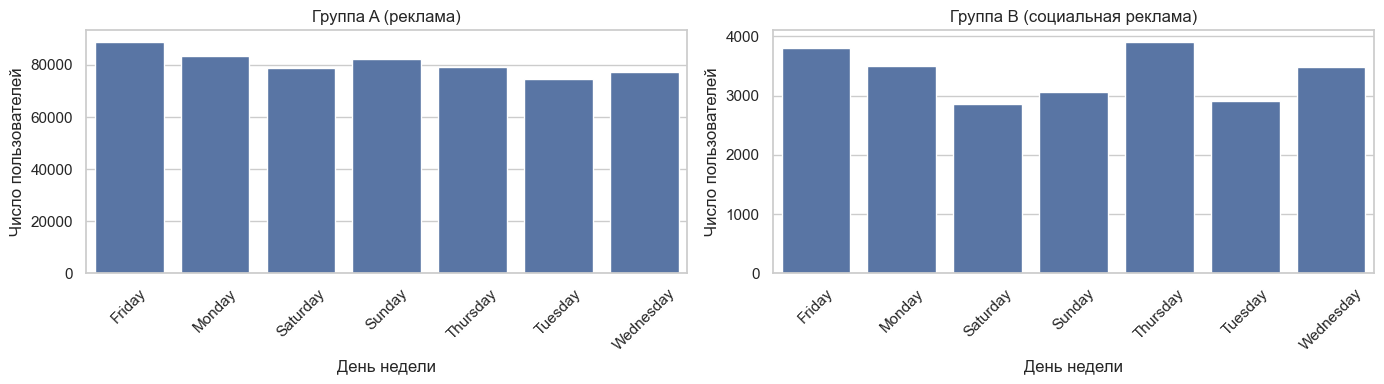

In [25]:
sns.set(style="whitegrid")

# Создаём два графика размером 14x4
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Гистограмма для группы A (ad)
sns.countplot(x='most ads day', data=group_ad, ax=axes[0])
axes[0].set_title('Группа A (реклама)', fontsize=12)
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Число пользователей')
axes[0].tick_params(axis='x', rotation=45)

# Гистограмма для группы B (psa)
sns.countplot(x='most ads day', data=group_psa, ax=axes[1])
axes[1].set_title('Группа B (социальная реклама)', fontsize=12)
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Число пользователей')
axes[1].tick_params(axis='x', rotation=45)

# Отображаем графики
plt.tight_layout()
plt.show()

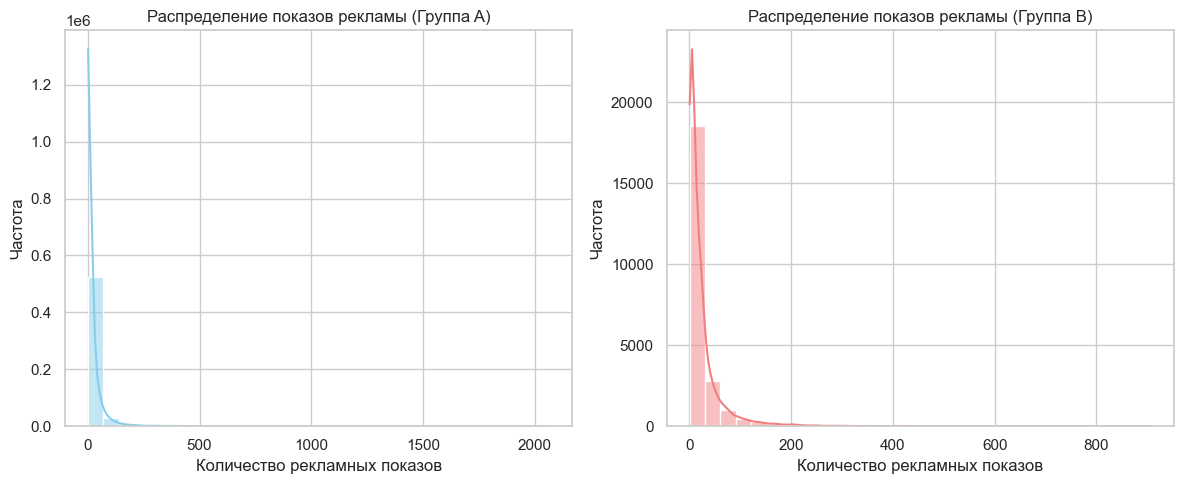

In [26]:
# Размер графиков
plt.figure(figsize=(12, 5))

# Группа A (ad)
plt.subplot(1, 2, 1)
sns.histplot(group_ad['total ads'], bins=30, kde=True, color='skyblue')
plt.title('Распределение показов рекламы (Группа A)', fontsize=12)
plt.xlabel('Количество рекламных показов')
plt.ylabel('Частота')

# Группа B (psa)
plt.subplot(1, 2, 2)
sns.histplot(group_psa['total ads'], bins=30, kde=True, color='lightcoral')
plt.title('Распределение показов рекламы (Группа B)', fontsize=12)
plt.xlabel('Количество рекламных показов')
plt.ylabel('Частота')

# Выравнивание
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import shapiro, ks_2samp

# Тест Шапиро-Уилка (по 5000 случайных наблюдений)
print("Шапиро-Уилк:")
print("Группа A:", shapiro(group_ad['total ads'].sample(5000, random_state=42)))
print("Группа B:", shapiro(group_psa['total ads'].sample(5000, random_state=42)))

# Тест Колмогорова-Смирнова
ks = ks_2samp(group_ad['total ads'], group_psa['total ads'])
print(f"Колмогоров-Смирнов: D = {ks.statistic:.3f}, p = {ks.pvalue:.3e}")

Шапиро-Уилк:
Группа A: ShapiroResult(statistic=0.5145534776257306, pvalue=1.6395822311369596e-79)
Группа B: ShapiroResult(statistic=0.521439862984745, pvalue=3.3272534219104105e-79)
Колмогоров-Смирнов: D = 0.040, p = 2.343e-31


Распределение total ads в обеих группах не является нормальным (очень низкие p-value). Между группами также есть статистически значимые различия по этому признаку.

In [28]:
grouped_data = df.groupby('test group').agg({'user id': 'count', 'converted': 'sum', 'total ads': 'sum'}).rename({'user id': 'count_of_visits', 'converted': 'count_of_purchases'}, axis=1)
grouped_data['conversion'] = grouped_data['count_of_purchases'] / grouped_data['count_of_visits'] * 100
grouped_data['mean ads'] = grouped_data['total ads'] / grouped_data['count_of_visits']
display(grouped_data)

C:\Users\NikLeo\AppData\Local\Temp\ipykernel_2660\2512845533.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('test group').agg({'user id': 'count', 'converted': 'sum', 'total ads': 'sum'}).rename({'user id': 'count_of_visits', 'converted': 'count_of_purchases'}, axis=1)


,count_of_visits,count_of_purchases,total ads,conversion,mean ads
test group,,,,,
ad,564577,14423,14014701,2.554656,24.823365
psa,23524,420,582481,1.785411,24.761138


C:\Users\NikLeo\AppData\Local\Temp\ipykernel_2660\2581681933.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groups, y=conversion_rates, palette=colors, ax=ax1)
C:\Users\NikLeo\AppData\Local\Temp\ipykernel_2660\2581681933.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groups, y=purchases, palette=colors, ax=ax2)
C:\Users\NikLeo\AppData\Local\Temp\ipykernel_2660\2581681933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groups, y=avg_ads, palette=colors, ax=ax3)


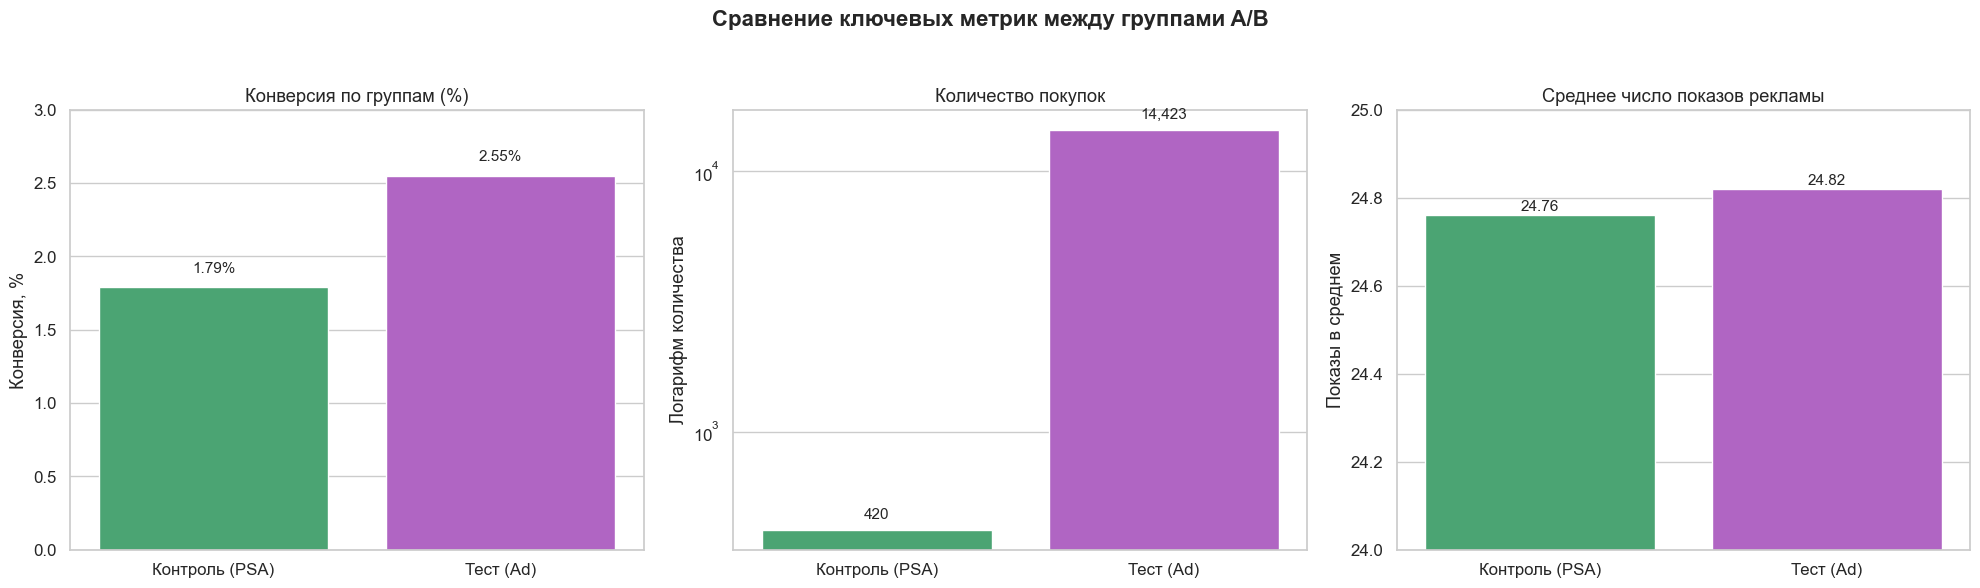

In [29]:
groups = ['Контроль (PSA)', 'Тест (Ad)']
conversion_rates = [1.79, 2.55]  # в процентах
purchases = [420, 14423]         # абсолютные значения
avg_ads = [24.76, 24.82]         # среднее количество рекламы

# Цвета
colors = ['mediumseagreen', 'mediumorchid']

# Стиль
sns.set(style="whitegrid", font_scale=1.1)

# Создание графиков
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# 1. Конверсия
sns.barplot(x=groups, y=conversion_rates, palette=colors, ax=ax1)
ax1.set_title('Конверсия по группам (%)')
ax1.set_ylabel('Конверсия, %')
ax1.set_xlabel('')
ax1.set_ylim(0, 3)
for i, v in enumerate(conversion_rates):
    ax1.text(i, v + 0.1, f"{v:.2f}%", ha='center', fontsize=11)

# 2. Количество покупок
sns.barplot(x=groups, y=purchases, palette=colors, ax=ax2)
ax2.set_title('Количество покупок')
ax2.set_ylabel('Логарифм количества')
ax2.set_xlabel('')
ax2.set_yscale('log')
for i, v in enumerate(purchases):
    ax2.text(i, v * 1.1, f"{v:,}", ha='center', fontsize=11)

# 3. Среднее количество рекламы
sns.barplot(x=groups, y=avg_ads, palette=colors, ax=ax3)
ax3.set_title('Среднее число показов рекламы')
ax3.set_ylabel('Показы в среднем')
ax3.set_xlabel('')
ax3.set_ylim(24, 25)
for i, v in enumerate(avg_ads):
    ax3.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=11)

plt.suptitle('Сравнение ключевых метрик между группами A/B', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 

In [31]:
from statsmodels.stats.proportion import proportions_ztest

# Данные для теста
conversion_counts = [14423, 420]  # Количество успешных конверсий
total_counts = [564577, 23524]  # Общее количество наблюдений

# Z-тест для пропорций
z_stat, p_val = proportions_ztest(conversion_counts, total_counts)
print(f"Z-тест: Статистика = {z_stat:.3f}, p-value = {p_val:.5f}")

# Проверка на статистическую значимость
threshold = 0.05
if p_val < threshold:
    print("Различия статистически значимы: отклоняем нулевую гипотезу")
else:
    print("Различия не статистически значимы: не отклоняем нулевую гипотезу")

Z-тест: Статистика = 7.370, p-value = 0.00000
Различия статистически значимы: отклоняем нулевую гипотезу


Реклама (группа A) показала статистически значимое улучшение конверсии по сравнению с контрольной группой (группа B) на 0.77%. Разница конверсий (A-B)=0.0255−0.0178=0.0077
Можно рекомендовать внедрять изменения из группы А (рекламную кампанию)

## T-тест для среднего количества показов рекламы

In [34]:
from scipy import stats

# T-тест для проверки различий в средних значениях количества показов рекламы
t_stat, p_val = stats.ttest_ind(
    group_ad['total ads'], group_psa['total ads'], equal_var=False  # Welch's t-test для разных дисперсий
)

# Результат T-теста
print(f"\nРезультат T-теста для показов рекламы:")
print(f"Статистика = {t_stat:.3f}, p-value = {p_val:.5f}")

# Интерпретация
if p_val < threshold:
    print("Различия в показах рекламы статистически значимы")
else:
    print("Различия в показах рекламы не значимы")


Результат T-теста для показов рекламы:
Статистика = 0.218, p-value = 0.82743
Различия в показах рекламы не значимы


Нет статистически значимых различий в среднем количестве показов рекламы между группами.

Это подтверждает, что эффект в конверсии связан именно с рекламной кампанией, а не с количеством показов.

## Доверительные интервалы для конверсий

In [36]:
from statsmodels.stats.proportion import proportion_confint

# Вычисляем доверительные интервалы для конверсий
conf_interval_ad = proportion_confint(conversion_counts[0], total_counts[0], alpha=0.05, method='wilson')
conf_interval_psa = proportion_confint(conversion_counts[1], total_counts[1], alpha=0.05, method='wilson')

# Вывод доверительных интервалов для конверсий
print("Доверительные интервалы для конверсий:")
print(f"Группа A (реклама): [{conf_interval_ad[0]:.4f}, {conf_interval_ad[1]:.4f}]")
print(f"Группа B (PSA):     [{conf_interval_psa[0]:.4f}, {conf_interval_psa[1]:.4f}]")

Доверительные интервалы для конверсий:
Группа A (реклама): [0.0251, 0.0260]
Группа B (PSA):     [0.0162, 0.0196]


## Разница конверсий и её доверительный интервал

In [38]:
import math

# Вычисление разницы в конверсиях
conversion_rate_ad = conversion_counts[0] / total_counts[0]
conversion_rate_psa = conversion_counts[1] / total_counts[1]
conversion_diff = conversion_rate_ad - conversion_rate_psa

# Стандартная ошибка разницы
stderr_diff = math.sqrt(conversion_rate_ad*(1-conversion_rate_ad)/total_counts[0] + conversion_rate_psa*(1-conversion_rate_psa)/total_counts[1])

# Доверительный интервал для разницы
confidence_interval_diff = (conversion_diff - 1.96*stderr_diff, conversion_diff + 1.96*stderr_diff)

# Вывод разницы и доверительного интервала
print(f"\nРазница конверсий (A-B): {conversion_diff:.4f}")
print(f"95% ДИ для разницы: [{confidence_interval_diff[0]:.4f}, {confidence_interval_diff[1]:.4f}]")


Разница конверсий (A-B): 0.0077
95% ДИ для разницы: [0.0060, 0.0094]


## Относительный прирост конверсии

In [40]:
# Расчет относительного прироста конверсии
relative_uplift = (grouped_data.loc['ad', 'conversion'] - grouped_data.loc['psa', 'conversion']) / grouped_data.loc['psa', 'conversion'] * 100
print(f"Относительный прирост конверсии: {relative_uplift:.1f}%")

Относительный прирост конверсии: 43.1%


Рекламная кампания привела к 43.1% увеличению конверсии по сравнению с контрольной группой.

## Доверительные интервалы для среднего количества показов рекламы

In [42]:
# Данные по рекламе
mean_ad = 24.823365
mean_psa = 24.761138
std_ad = group_ad['total ads'].std()
std_psa = group_psa['total ads'].std()
n_ad = len(group_ad)
n_psa = len(group_psa)

# Доверительные интервалы для среднего количества показов
ci_ad = (
    mean_ad - 1.96 * std_ad / math.sqrt(n_ad),
    mean_ad + 1.96 * std_ad / math.sqrt(n_ad)
)

ci_psa = (
    mean_psa - 1.96 * std_psa / math.sqrt(n_psa),
    mean_psa + 1.96 * std_psa / math.sqrt(n_psa)
)

# Вывод доверительных интервалов
print("\nДоверительные интервалы для среднего количества показов рекламы:")
print(f"Группа A: [{ci_ad[0]:.2f}, {ci_ad[1]:.2f}]")
print(f"Группа B: [{ci_psa[0]:.2f}, {ci_psa[1]:.2f}]")


Доверительные интервалы для среднего количества показов рекламы:
Группа A: [24.71, 24.94]
Группа B: [24.21, 25.31]


## Визуализация доверительных интервалов

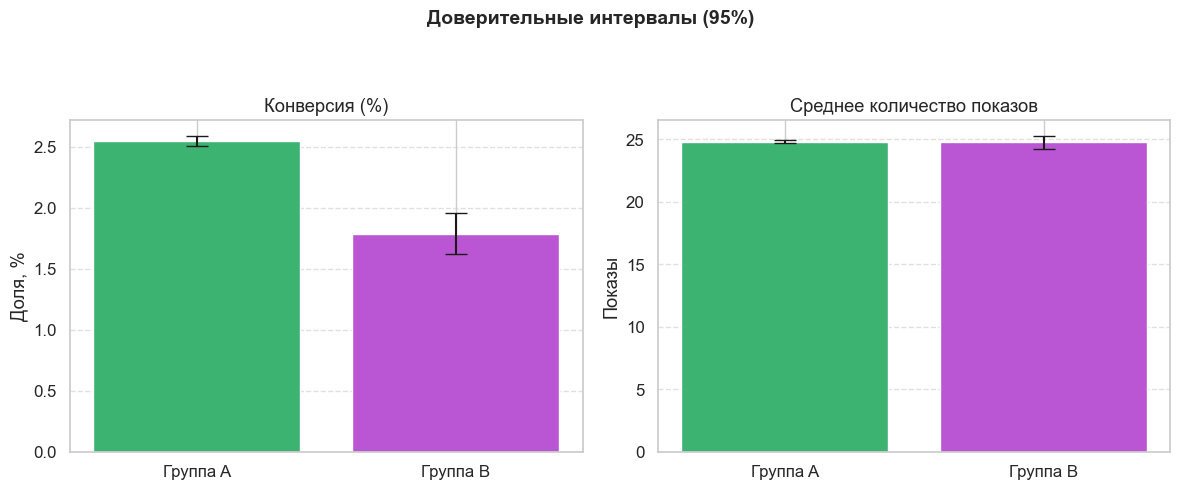

In [48]:
import matplotlib.pyplot as plt

# Значения и ошибки для конверсии (в процентах)
conversion_values = [conversion_rate_ad * 100, conversion_rate_psa * 100]
conversion_err = [
    (conversion_values[0] - conf_interval_ad[0] * 100, conf_interval_ad[1] * 100 - conversion_values[0]),
    (conversion_values[1] - conf_interval_psa[0] * 100, conf_interval_psa[1] * 100 - conversion_values[1])
]

# Значения и ошибки для показов рекламы
ad_means = [mean_ad, mean_psa]
ad_err = [
    (mean_ad - ci_ad[0], ci_ad[1] - mean_ad),
    (mean_psa - ci_psa[0], ci_psa[1] - mean_psa)
]


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Доверительные интервалы (95%)', fontsize=14, fontweight='bold')

# Доверительный интервал для конверсии
axs[0].bar(['Группа A', 'Группа B'], conversion_values, 
           yerr=list(zip(*conversion_err)), capsize=8, color=colors)
axs[0].set_title('Конверсия (%)')
axs[0].set_ylabel('Доля, %')
axs[0].grid(True, linestyle='--', alpha=0.6, axis='y')

# Доверительный интервал для среднего количества показов
axs[1].bar(['Группа A', 'Группа B'], ad_means, 
           yerr=list(zip(*ad_err)), capsize=8, color=colors)
axs[1].set_title('Среднее количество показов')
axs[1].set_ylabel('Показы')
axs[1].grid(True, linestyle='--', alpha=0.6, axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

График показывает, что в группе с рекламой (Ad) конверсия выше, чем в группе без рекламы (PSA).
Конверсия в группе A (Ad) составляет 2.55%, а в группе B (PSA) — 1.79%.
Это означает, что рекламная кампания привела к увеличению конверсии на 0.76 процентных пункта.
Таким образом, можно предположить, что реклама оказывает положительное влияние на конверсию.
Доверительные интервалы для среднего количества показов рекламы указывают на отсутствие статистически значимых различий между группами (p = 0.827). Это подтверждает, что различия в частоте показов между группами незначительны. Однако стоит отметить, что широкий интервал для группы B (PSA) обусловлен меньшим размером выборки (23,524 наблюдения в группе B против 564,577 в группе A), что увеличивает неопределенность в оценке.

# Вывод

Рекламная кампания (Группа A) привела к значимому увеличению конверсии на 0.77%.

Отсутствие различий в среднем количестве показов рекламы подтверждает, что результат связан с самим рекламным контентом.

Относительный прирост конверсии составил 43.1%, что говорит о значительном влиянии рекламной кампании на результаты.
